

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<h1><center>
    
Exam version A
 
( 7th of November, 2019 )
</center></h1>    

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Please read the exercices carefully, write the necesary code and respond to all the questions. The code needs to be properly commented.


In [ ]:
import numpy as np # useful for manipulating matrices
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
from skimage import *

# Exercise 1  (2 points)

**(a) (2 points)** - Load the grayscale image `circles.bmp` stored in the `images` directory and visualize it. Convert it into a color image where the first circle should become red, the second - green and the third - blue, as it is shown below.
 
<img src="images/circles_rgb.bmp" width="200">

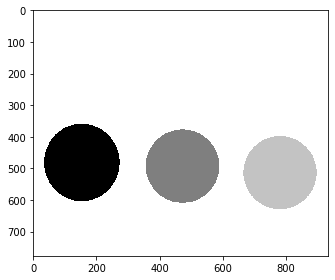

[  0 127 195 255]


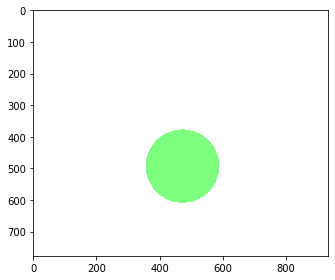

In [60]:
from skimage import *
import numpy as np
import skimage
from skimage import io
from skimage.color import rgb2gray, gray2rgb

import matplotlib.pyplot as plt
%matplotlib inline
cercle = io.imread('images/circles.bmp')
io.imshow(cercle)
plt.show()
cercle1, cercle2, cercle3 = cercle.copy(), cercle.copy(), cercle.copy()

a = np.unique(cercle)
print(a)
#cerclergb = gray2rgb(cercle)
cercle[cercle==0]= cercle1[:,:,0]=255
cercle[cercle!= 127]= cercle[:,:,1]=255
#cercle[cercle3!=195]= cercle3[:,:,2]=255
io.imshow(cercle)
plt.show()

# Exercise 2  (4 points)
**(a) (4 points)** - Load the image collection stored in `images/bigbang/*.png`, and rescale to half of their size. It contains a video sequence with two persons who should be anonymized. Instead of blurrying the whole image, we want to define two static rectangular areas that are as small as possible. These two areas should be blurried, ensuring that both faces cannot be clearly seen.

The two rectangular areas should be determined manually. For this purpose, it is sufficient to display one image of the sequence using `imshow` and pay attention to the approximate pixel coordinates where the faces of the two persons fall.

Below there is an example of the expected result for a given frame:

<img src="images/bigbang_example.png" width="500">

In [9]:
#We show the solution to show for each animation two videos

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from skimage import filters, util

ic = io.ImageCollection('images/bigbang/*.png')

# Here we change the scale to half its size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

#We show the relevant information 

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))



# create variable with dimensions of images by the number of frames

number_frames=np.ndarray(shape=(height,width,3,frames))

# we combinate with numer_number frames
for i in range(frames):
        number_frames[:,:,:,i]=transform.rescale(ic[i],scale)
        
print('shape image is: ' + str(number_frames.shape))

# 
# We create new mask 
#

#we use the plugin now
%matplotlib nbagg
mask_2d=np.ones((7,7))
mask_2d=gaussian(mask_2d, sigma=5,multichannel=True)

def figure(i):
    imm.set_array(conv_color(number_frames[:,:,:,i], mask_2d)) # we plot the convolved image with the mask_2d
    plt.draw()
    return imm,


def figure(i):
    imm.set_array(conv_color(number_frames[:,:,:,i], mask_2d)) # we plot the convolved image with the mask_2d
    plt.draw()
    return imm,

fig, ax1 = plt.subplots(1,1, figsize=(10,10))
image_0=number_frames[:,:,:,0]
image_1=ax1.imshow(image_0)
plt.show()
#ani = animation.FuncAnimation(fig, figure, interval=2,blit=Fla, repeat=False, frames=len(ic))
ani = animation.FuncAnimation(fig, figure, interval=5, blit=False, frames=400, repeat= False)
plt.show()

Info about the animation:
Num Frames:99
Images height:180
Images width:320
shape image is: (180, 320, 3, 99)


NameError: name 'gaussian' is not defined

# Exercise 3 (4 points)
**(a) (1 point)** Load the video in the folder `images/Barcelona-sequenceA`. Plot the first, middle and last frame in a 1x3 plot. Include titles in all images.

<img src="images/Barcelona-sequenceA/Barcelona-frame00104.png" width="200">

In [ ]:
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

ic = io.ImageCollection('images/Barcelona-sequenceA/*.png')

first = ic[0]
middle = ic[int(len(ic)/2)]
last = ic[-1]
f, axarr = plt.subplots(ncols=3,figsize=(16,14))
axarr[0].imshow(first)
axarr[0].set_title('First')
axarr[1].imshow(middle)
axarr[1].set_title('Middle image')
axarr[2].imshow(last)
axarr[2].set_title('Last image')



**(b) (2 points)** Now, in a 1x3 plot, show the frame, background, foreground image for the middle frame.

In [ ]:
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
from skimage import filters
from skimage import morphology

%matplotlib inline



def generate_bg_fg(inicial, final):
    size = list(ic[0].shape)
    background = np.zeros(size)

    images = list()
    red_channel = list()
    green_channel = list()
    blue_channel = list()
    
#Obtain the foreground image (e.g. using the median filter).

    for i in range(inicial, final + 1):
        
        images.append(img_as_float(ic[i]))
        red_channel.append(img_as_float(ic[i][:,:,0])) #add to a list each channel of each image
        green_channel.append(img_as_float(ic[i][:,:,1]))
        blue_channel.append(img_as_float(ic[i][:,:,2]))

    background[:,:,0] = np.median(red_channel,axis=0) #apply median filter for each channel
    background[:,:,1] = np.median(green_channel,axis=0)
    background[:,:,2] = np.median(blue_channel,axis=0)
    
    foreground = np.abs(images[0] - background) #foreground is the difference between the original image and the background
    
    return (background, foreground)
imagen = generate_bg_fg(middle, last)

#Algoritmo
print("shape of image: {}".format(middle.shape))
print("dtype of image: {}".format(middle.dtype))

axarr[0].imshow(middle)
axarr[0].set_title('Frame')
axarr[1].imshow(imagen[0])
axarr[1].set_title('background')
axarr[2].imshow(imagen[1])
axarr[2].set_title('foreground')



 **(c) (1 point)** Apply the SLIC segmentation method to the first 20 frames and calculate the number of segments per frame. Provide the frame number of the frame with the highest number of segments and plot it. 

<img src="images/final_result.png" width="500">

In [ ]:
from skimage import segmentation 
shot = 0
while shot <20:
    slic_image = segmentation.slic(ic[shot], n_segments=250, compactness=10, sigma=1)
    shot +=1
#falta terminar
